<a href="https://colab.research.google.com/github/Maddi007-Py/Maddi007-Py-CrimeAnalytics_Clustering/blob/main/Code%20Sections/5.5%20KMeans%20Feature%20Importance%20%26%205.6%20K-Elbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **5.5 KMeans Feature Importance & 5.6 K-Elbow**

Feature Importance based on KMeans Clustering:
                            Feature  Importance
9         Location_Engineered_Other    2.942930
7                  Hood_158_Encoded    2.611811
10       Location_Engineered_Public    0.720169
11  Location_Engineered_Residential    0.696770
3                        LONG_WGS84    0.507787
8                  Division_Encoded    0.445262
4                         LAT_WGS84    0.010176
0                          OCC_YEAR    0.006209
2                          OCC_HOUR    0.005596
6                   OCC_DOW_Encoded    0.001106
1                           OCC_DOY    0.000117
5                 OCC_Month_Encoded    0.000098
Silhouette Score: 0.48
Davies-Bouldin Index: 0.72
Calinski-Harabasz Index: 46809.25
Inertia: 434412.26


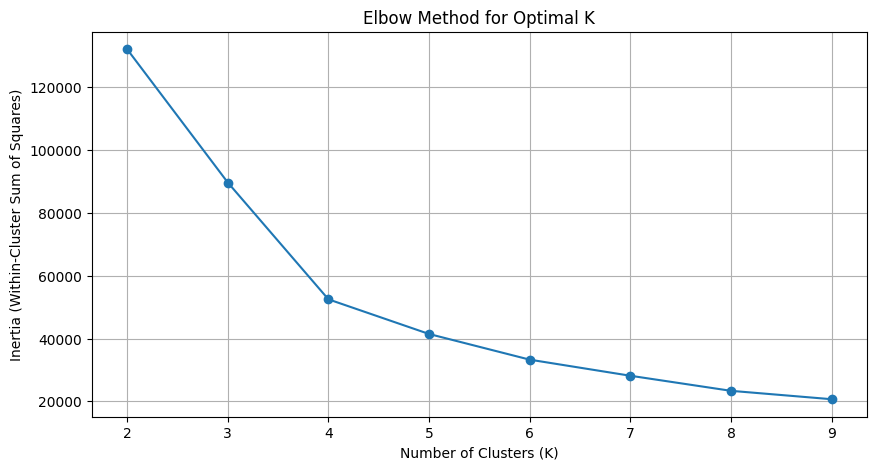

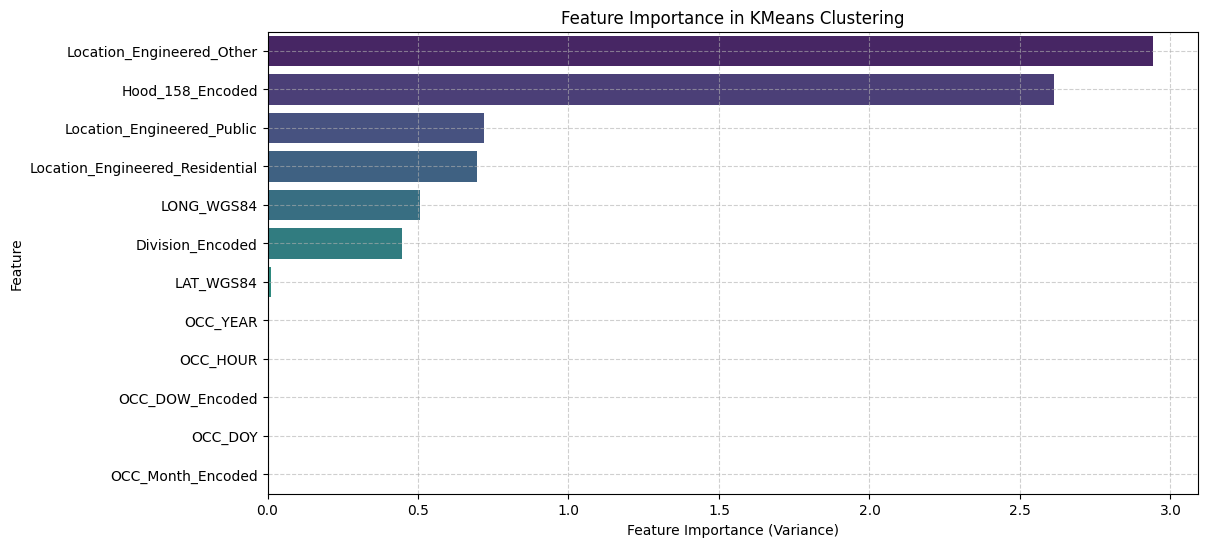

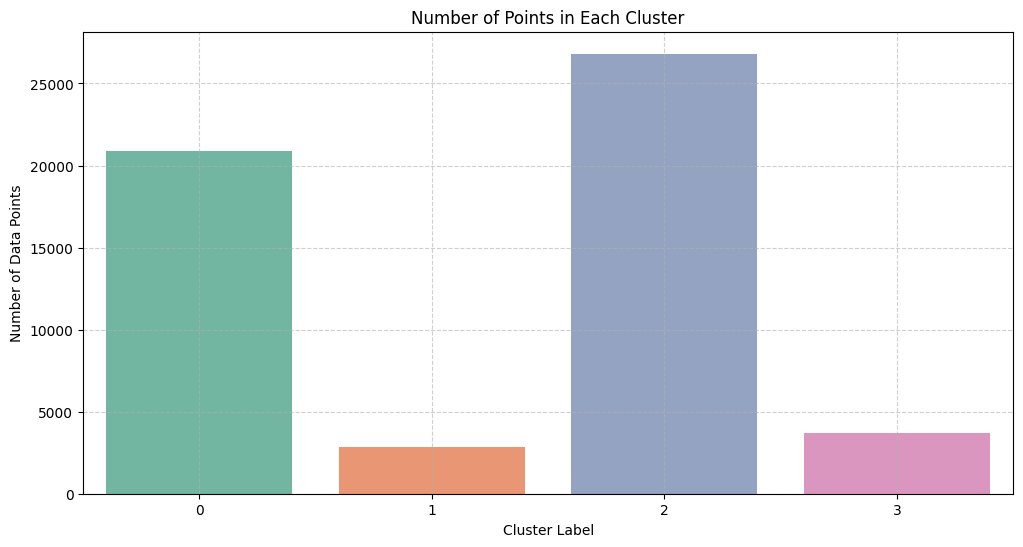

Updated dataset with cluster labels saved as 'FE_Encoded_with_Clusters.csv'.


In [5]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Data
url = "https://raw.githubusercontent.com/Maddi007-Py/Maddi007-Py-CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/FE_Encoded.csv"
df = pd.read_csv(url)

# Define Features
continuous_features = ['OCC_YEAR', 'OCC_DOY', 'OCC_HOUR', 'LONG_WGS84', 'LAT_WGS84']
encoded_features = ['OCC_Month_Encoded', 'OCC_DOW_Encoded', 'Hood_158_Encoded', 'Division_Encoded',
                    'Location_Engineered_Other', 'Location_Engineered_Public', 'Location_Engineered_Residential']

features = continuous_features + encoded_features

# Standardization
scaler = StandardScaler()
preprocessor = ColumnTransformer([('num', scaler, features)])

# KMeans Clustering Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42, n_init=10))
])

# Fit Pipeline
pipeline.fit(df)

# Transform Data
df_processed = pipeline.transform(df)

# Extract KMeans Model
kmeans = pipeline.named_steps['kmeans']
df['Cluster'] = kmeans.labels_  # Add Cluster Labels to DataFrame

# Calculate Feature Importance
centroids = kmeans.cluster_centers_
feature_importance = np.var(centroids, axis=0)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Print Textual Output
print("Feature Importance based on KMeans Clustering:")
print(importance_df)

print(f"Silhouette Score: {silhouette_score(df_processed, kmeans.labels_):.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(df_processed, kmeans.labels_):.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(df_processed, kmeans.labels_):.2f}")
print(f"Inertia: {kmeans.inertia_:.2f}")

# Elbow Method Plot (Check Optimal K)
inertia_values = []
K_range = range(2, 10)  # Testing K from 2 to 10

for k in K_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(df_processed)
    inertia_values.append(kmeans_test.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

# Feature Importance Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.xlabel("Feature Importance (Variance)")
plt.ylabel("Feature")
plt.title("Feature Importance in KMeans Clustering")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Cluster Distribution Visualization
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Cluster', hue='Cluster', palette="Set2", legend=False)  # Fix for FutureWarning
plt.title("Number of Points in Each Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Data Points")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Save updated dataset with Cluster Labels
df.to_csv("FE_Encoded_with_Clusters.csv", index=False)
print("Updated dataset with cluster labels saved as 'FE_Encoded_with_Clusters.csv'.")